In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])

In [5]:
 print(x)
 print(y)


[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
[ 5 20 14 32 22 38]


In [6]:
model = LinearRegression()

In [7]:
model.fit(x, y)

LinearRegression()

In [8]:
>>> r_sq = model.score(x, y)
>>> print('coefficient of determination:', r_sq)

coefficient of determination: 0.715875613747954


In [9]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 5.633333333333329
slope: [0.54]


In [10]:
new_model = LinearRegression().fit(x, y.reshape((-1, 1)))
print('intercept:', new_model.intercept_)
print('slope:', new_model.coef_)

intercept: [5.63333333]
slope: [[0.54]]


In [11]:
y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')

predicted response:
[ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]


In [12]:
y_pred = model.intercept_ + model.coef_ * x
print('predicted response:', y_pred, sep='\n')

predicted response:
[[ 8.33333333]
 [13.73333333]
 [19.13333333]
 [24.53333333]
 [29.93333333]
 [35.33333333]]


In [18]:
import numpy as np
x = np.linspace(-8, 11, 20)
# dependent variable of zeros and ones
if (x<=1):
    y=0
if(x>=1):
    y=1
# construct the matrix of independent samples
 
#Plot the initial data
 
h = figure;
hold on
plot(X(:,2), y,'k*'); hold on
txtlegend = {'initial data'};
colors = {'r-','g-', 'b-', 'c-', 'm-', 'y-'};
ncolor  = 0;
 
# Set the constant for iteration convergence
 
# the algorithm stops when the difference of the parameter is small
TolFun = 10^-3;
 
# Define the initial value of the parameters
 
# 1st element, function of the mean value of y's
b0 = log(mean(y)/(1-mean(y)));
# column-vector of parameters
b = [b0 zeros(size(X,2)-1,1)]';
 
#  The Newton-Raphson procedure
 
while 1==1
    # the logit^-1 variable is function of parameters
    z = X*b;
    # recover the regression
    p = 1./(1+exp(-z));
    # calculate the weights of the samples
    w = p.*(1-p);
    # calculate the dependent variable for this step of least squares
    u = z + (y-p)./w;
 
    # plot the results of this step
    p
    lot(x, p, colors{mod(ncolor,length(colors))+1});
    ncolor = ncolor + 1; % change color
    txtlegend{end+1} = ['iteration ', num2str(ncolor)];
 
    # store old parameters
    b_old = b;
    # calculate new parameters with least squares
    b = inv( X'*diag(w)*X ) * X' * diag(w) * u;
 
    # termanate the iterations if changes of the parameters are small
    if sumsqr(b - b_old) <= TolFun, break; end
end
 
#  Show the result
 
# claculate recovered dependent variable
p = 1./(1+exp(-X*b));
# plot the result
txtlegend{end+1} = 'recovered data';
plot(x, p,'rs');
legend(txtlegend);
axis tight
xlabel('x');
ylabel('p = (1+e^z)^{-1}, x = b_0+b_1x');
 
# Notes
# In Matlab there are glmfit and glmval functuions. Use them for
# professional purposes.
 


SyntaxError: invalid syntax (<ipython-input-18-7db7f6e0ee67>, line 20)

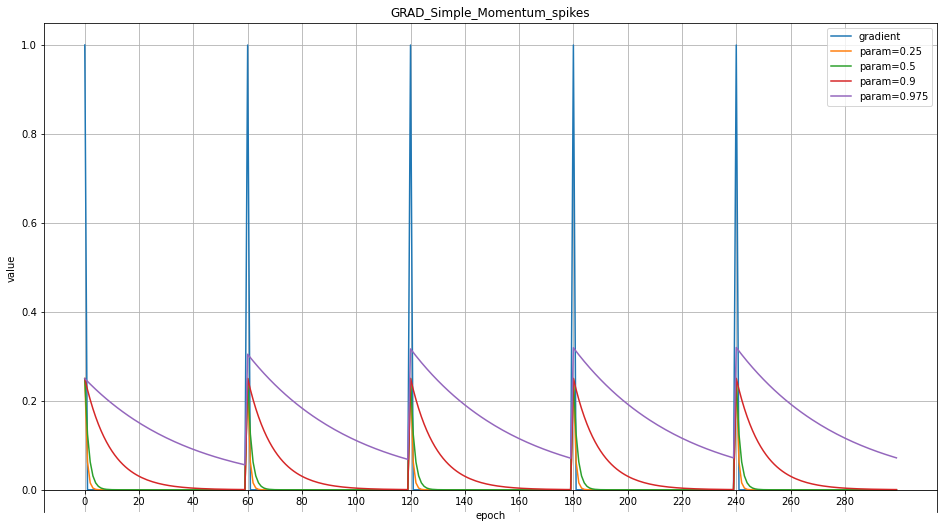

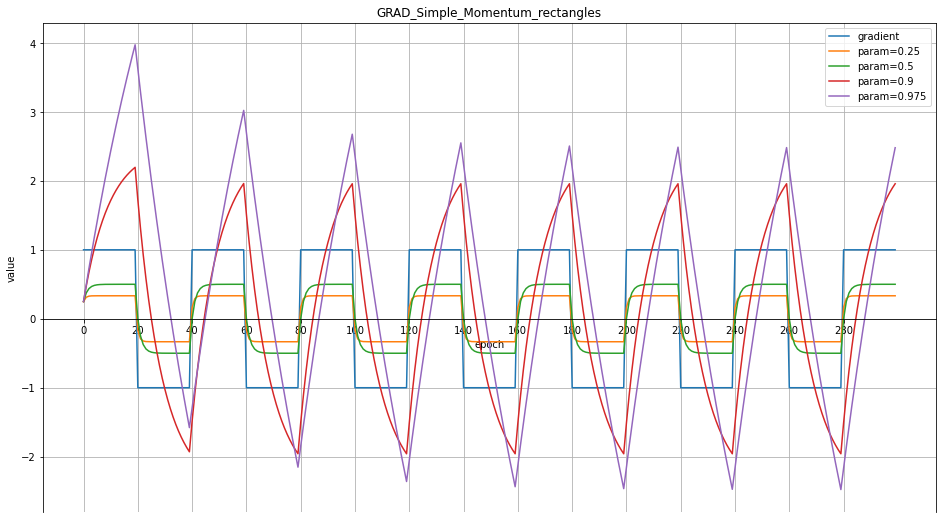

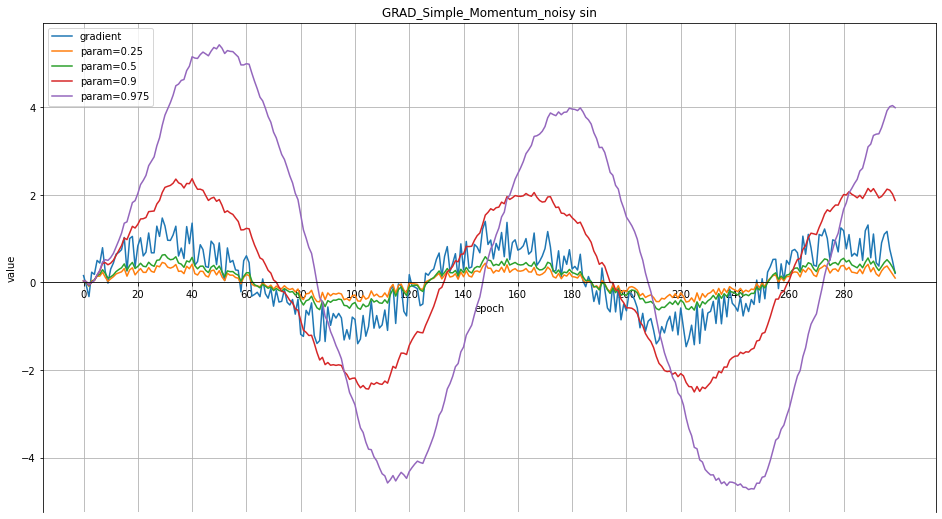

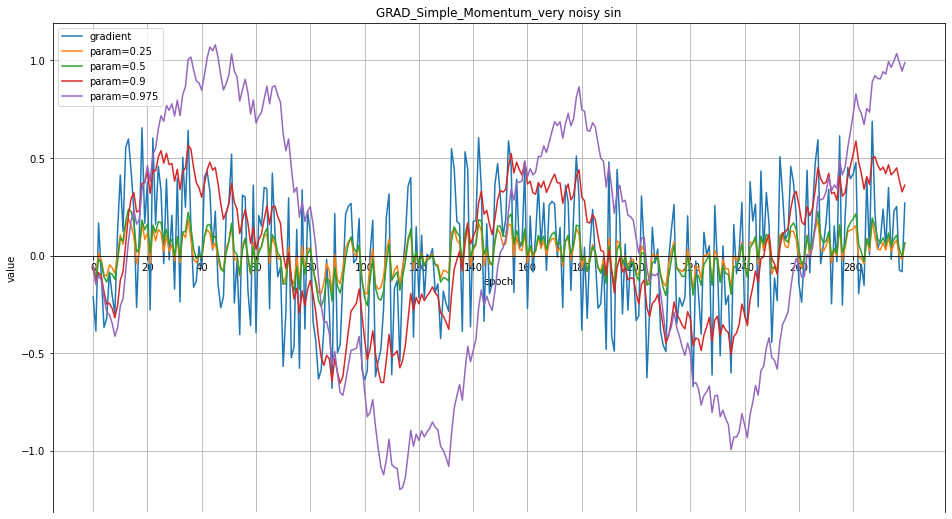

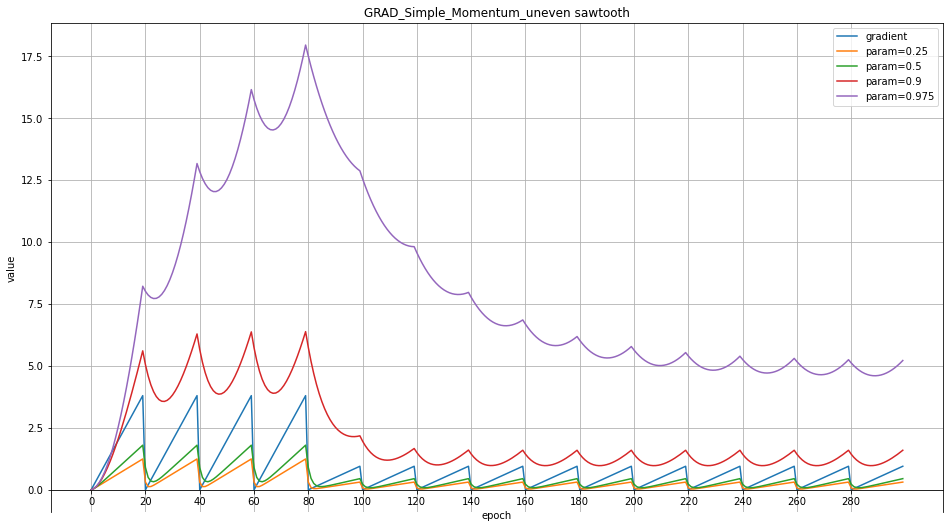

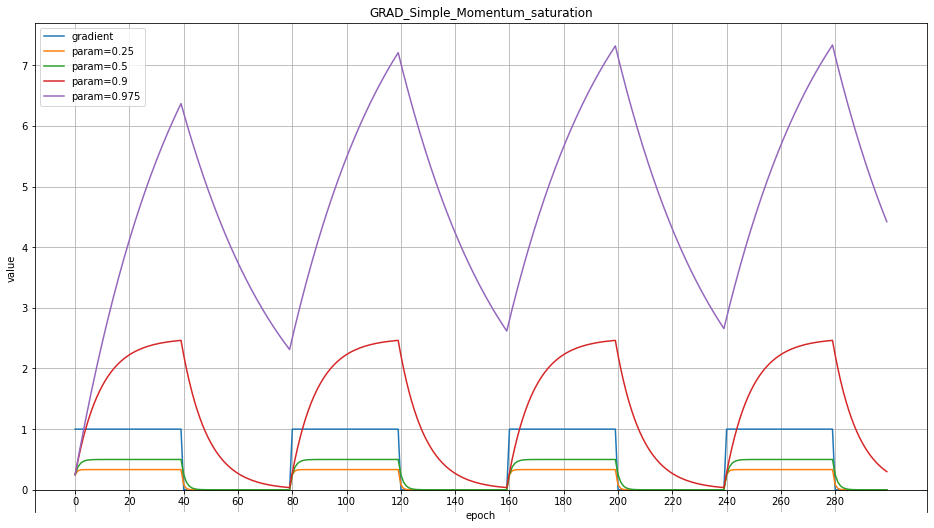

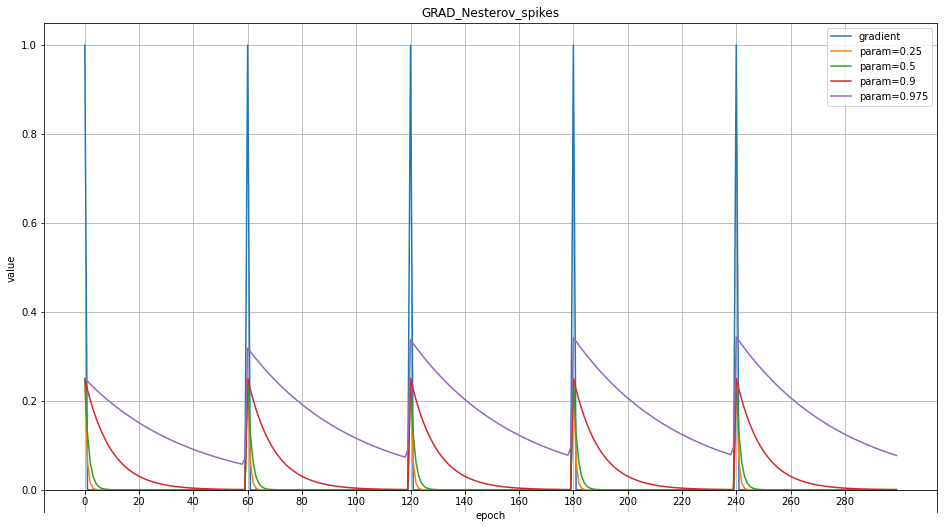

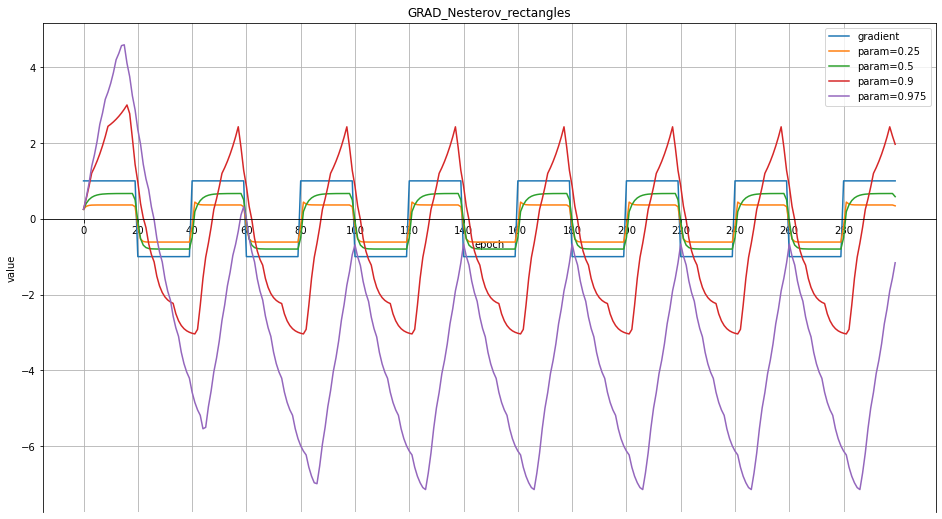

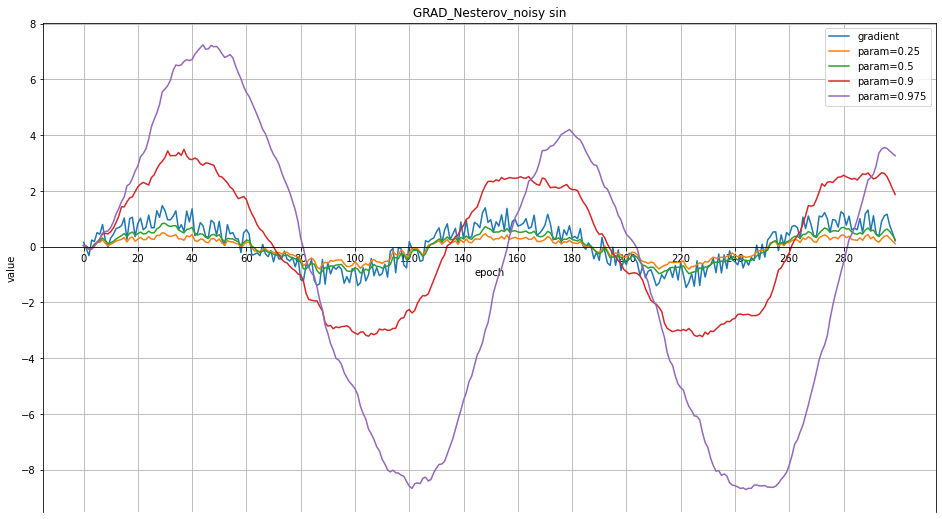

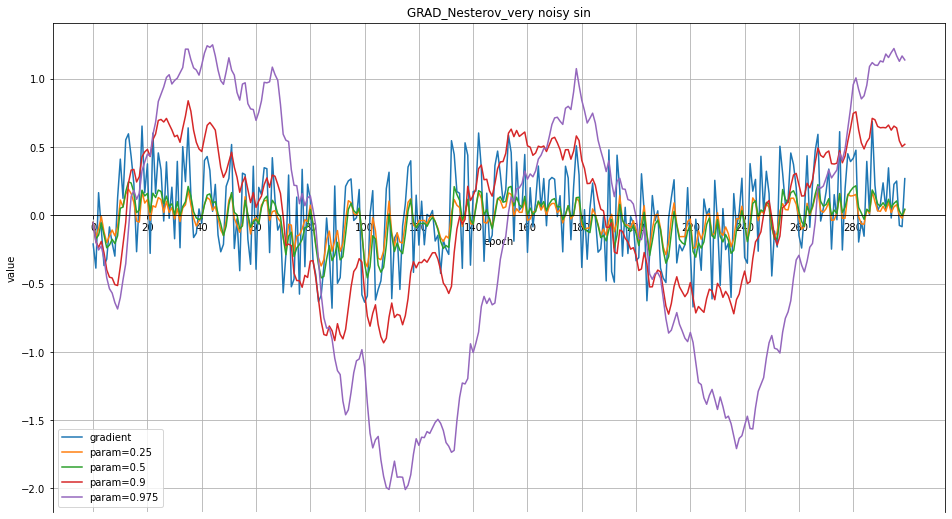

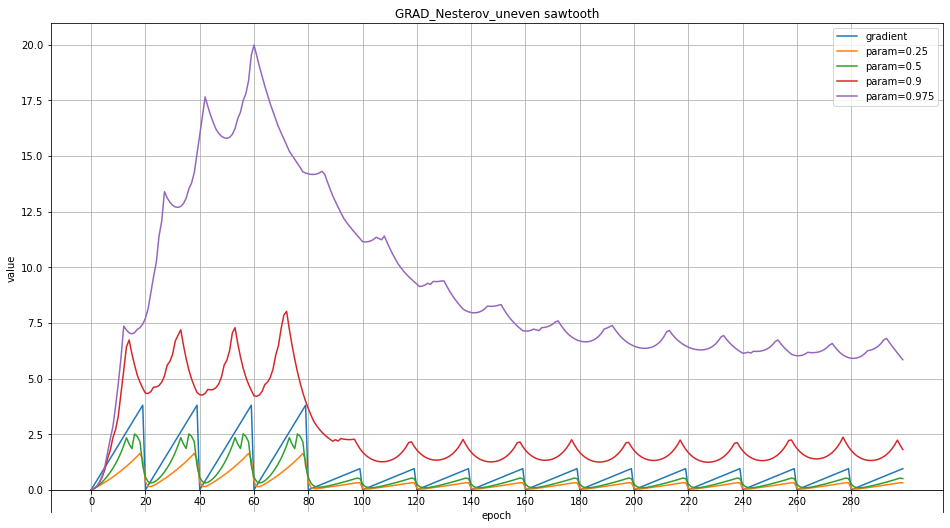

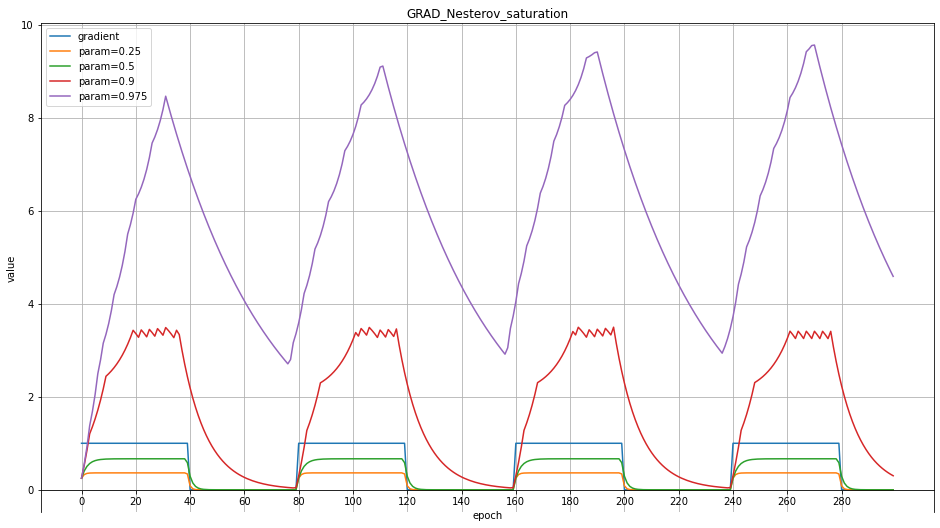

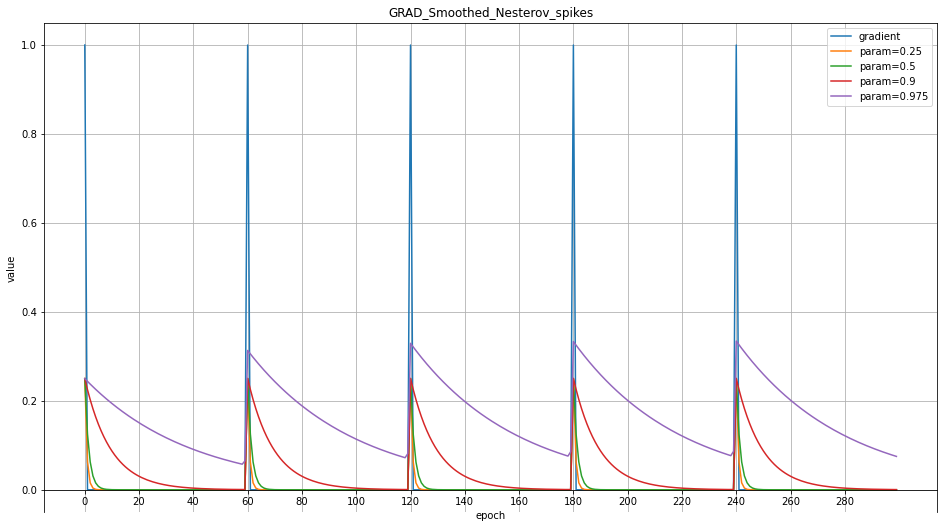

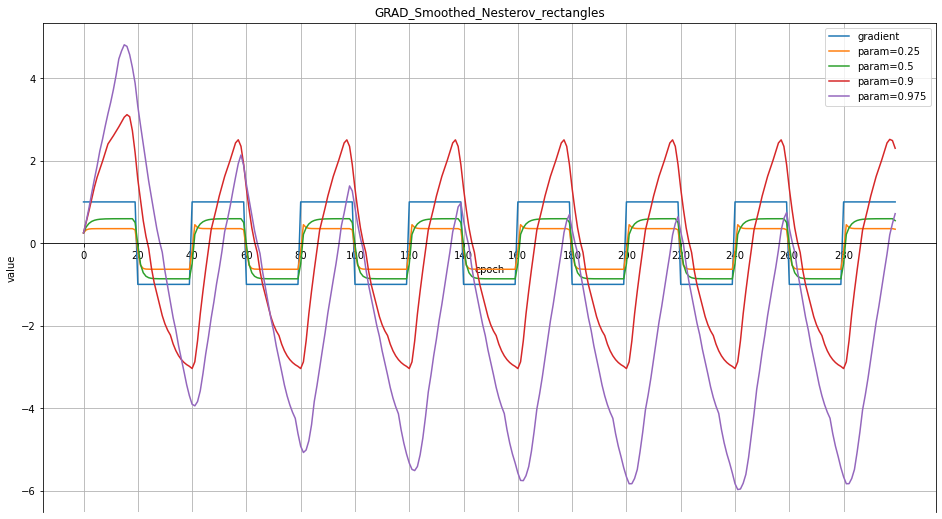

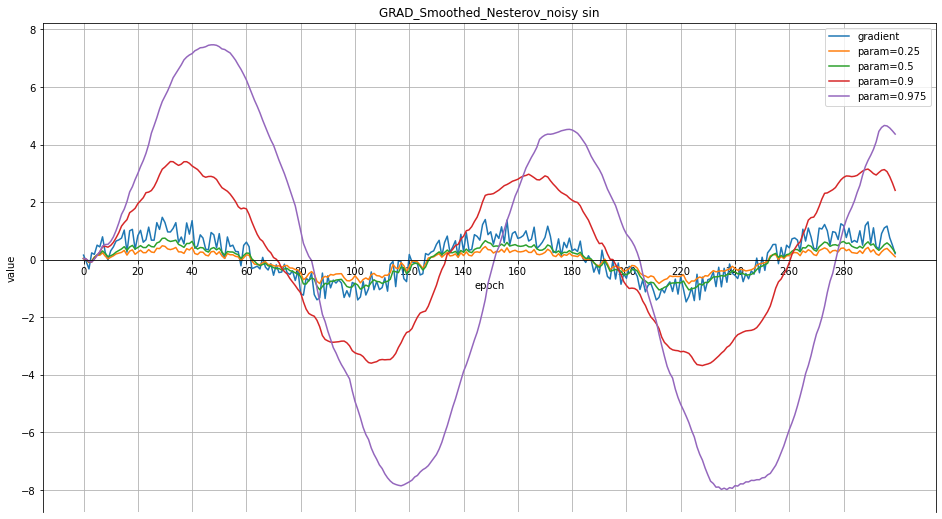

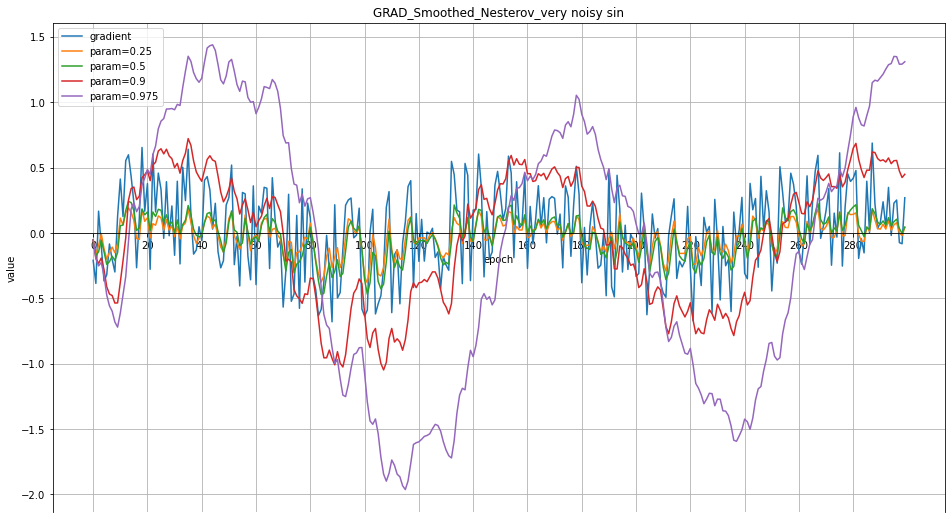

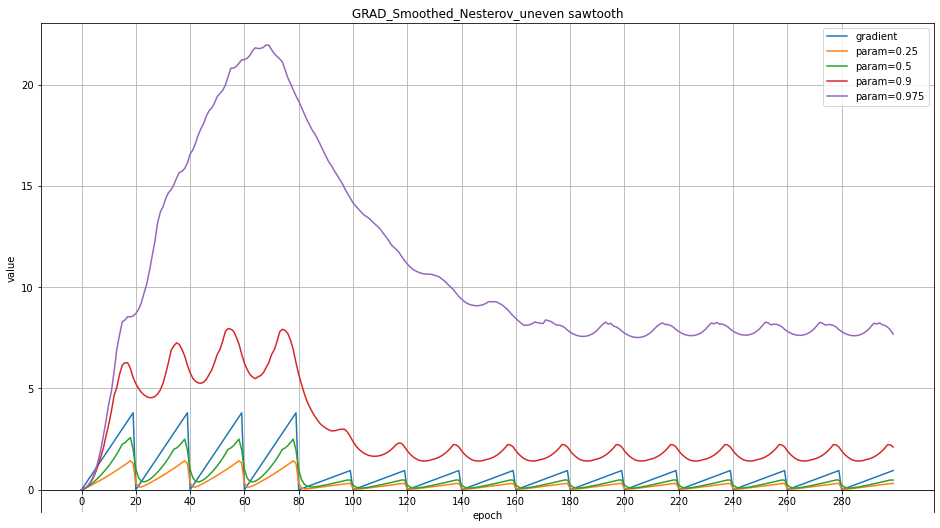

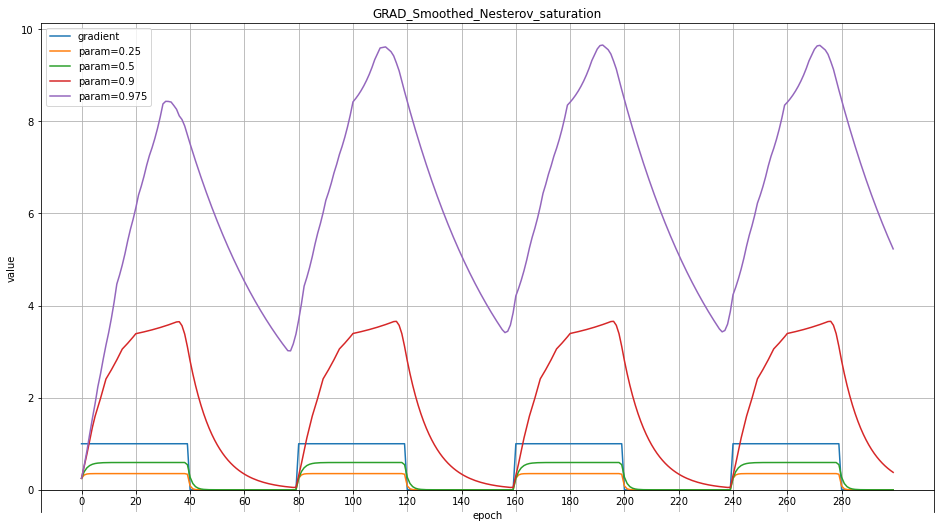

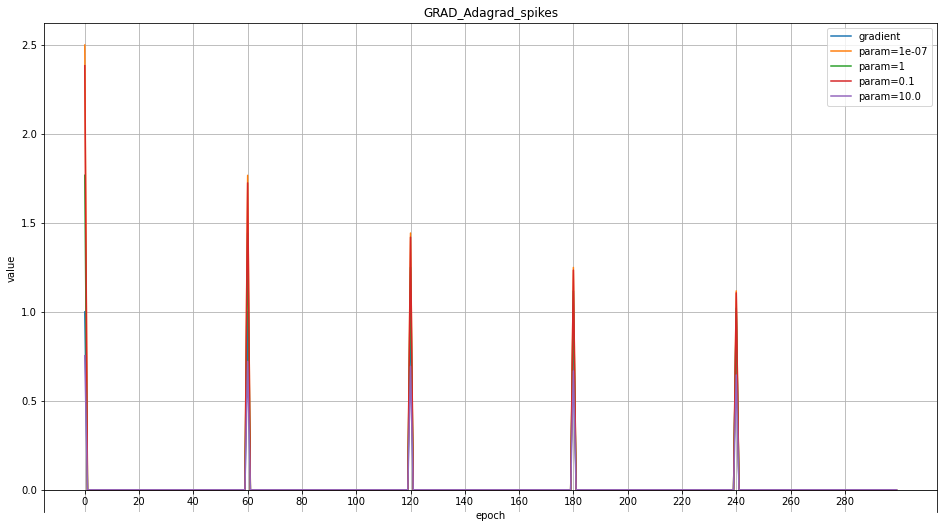

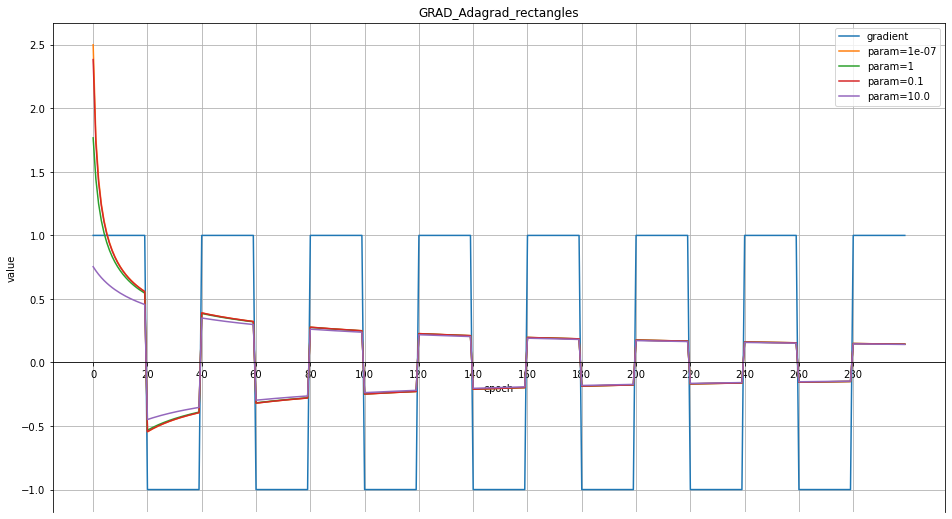

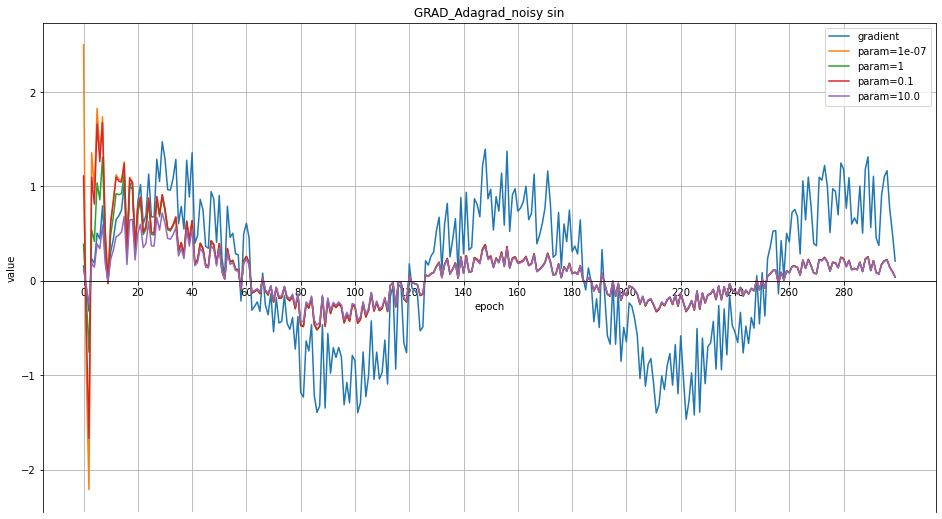

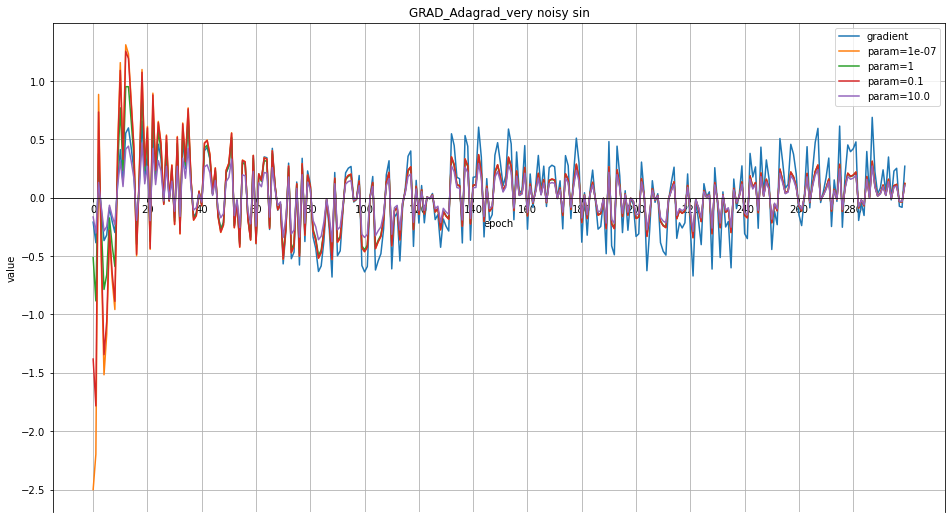

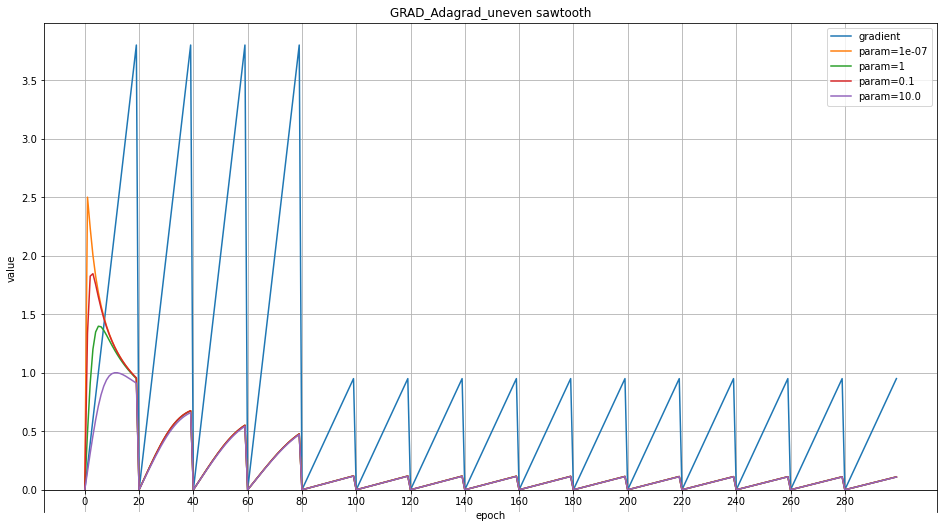

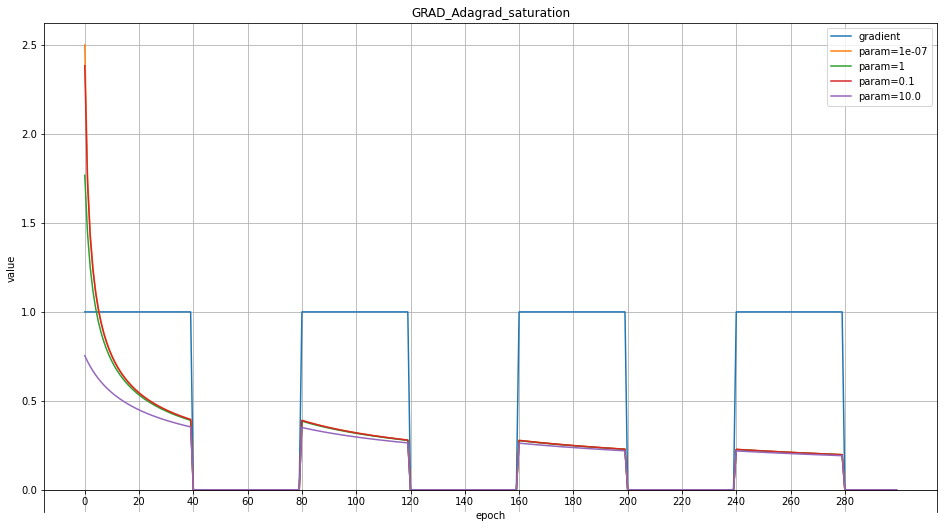

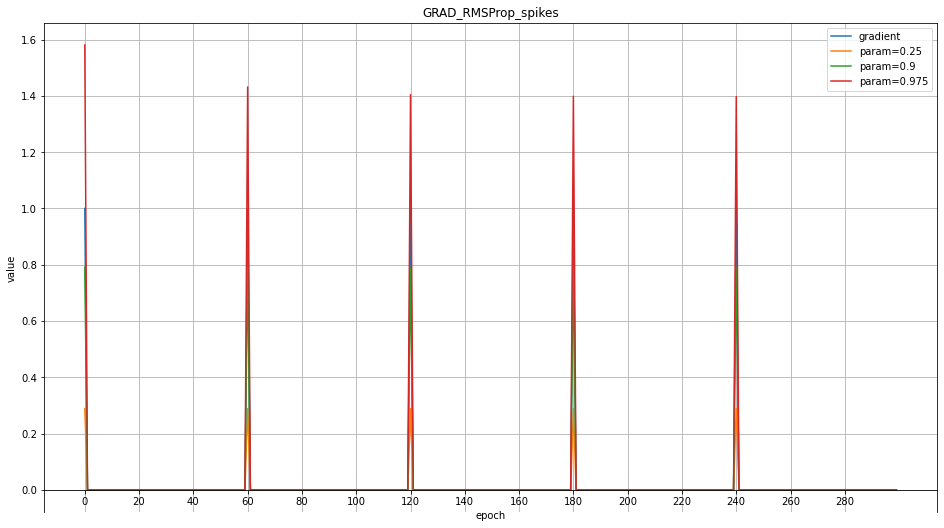

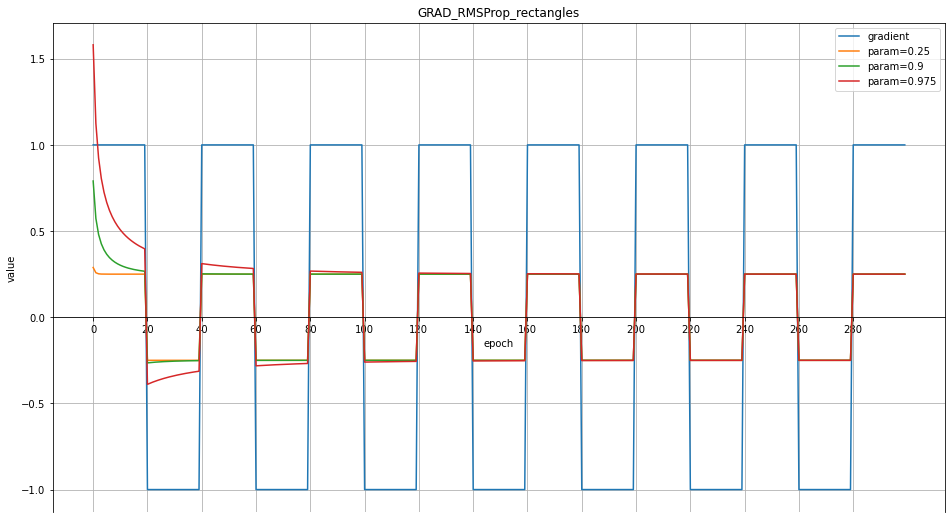

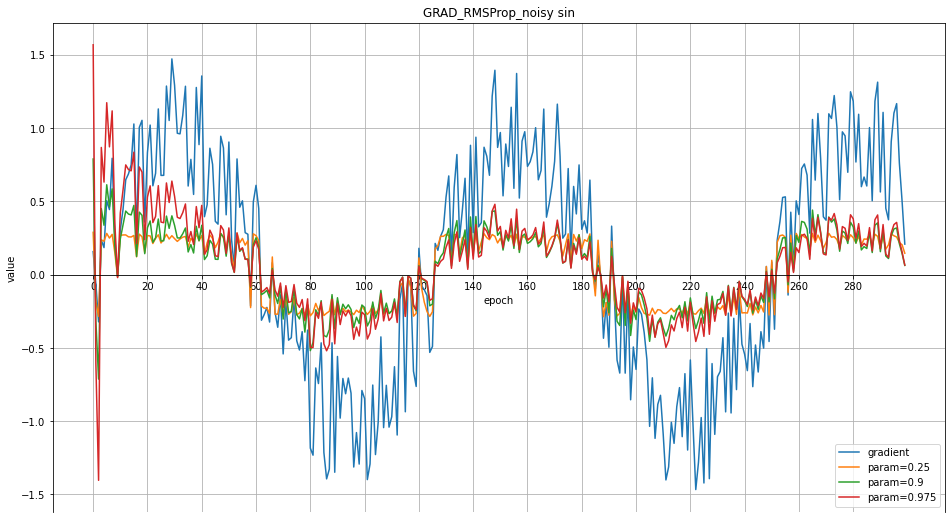

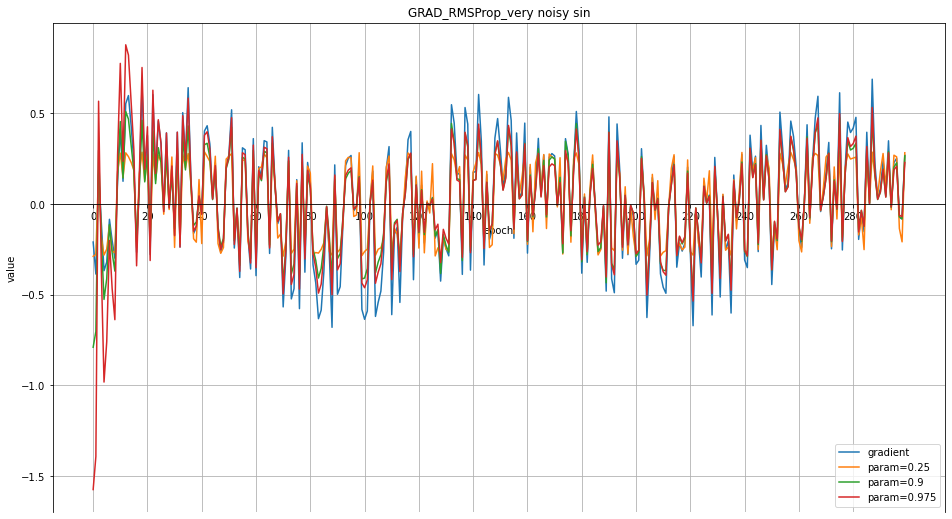

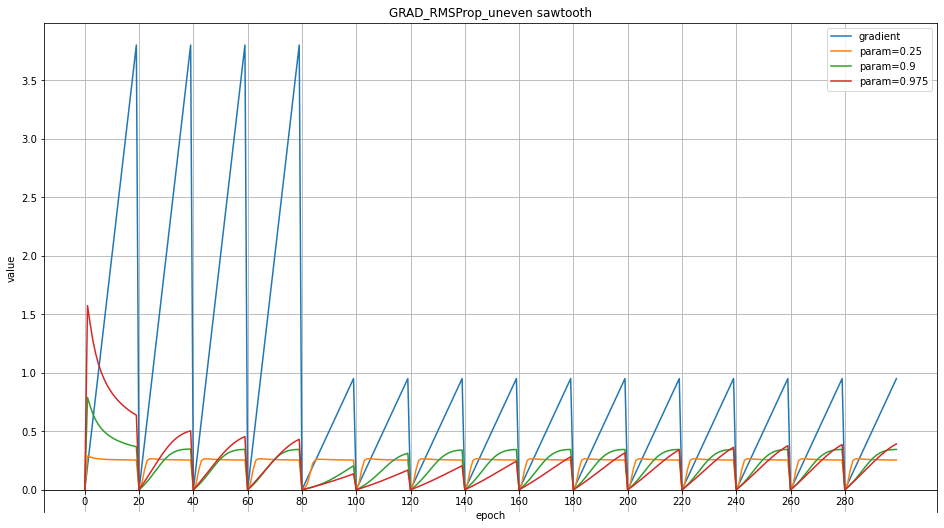

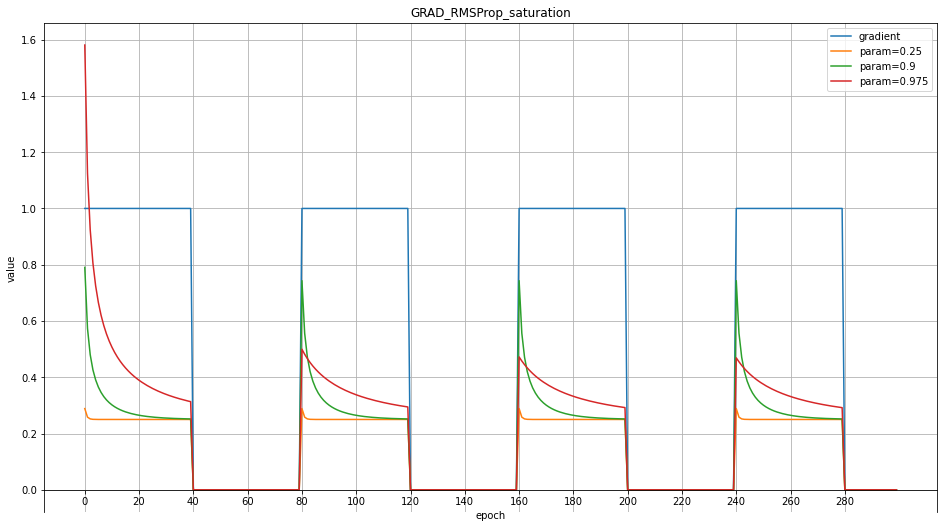

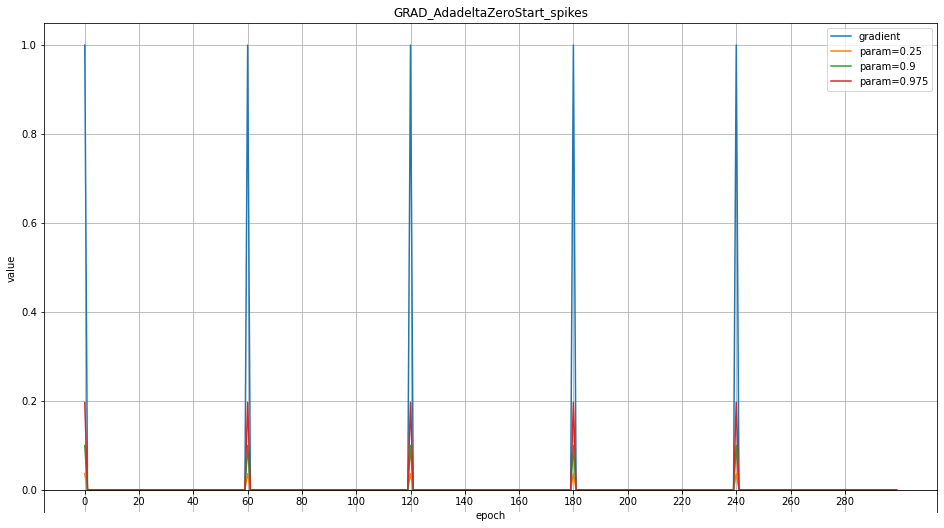

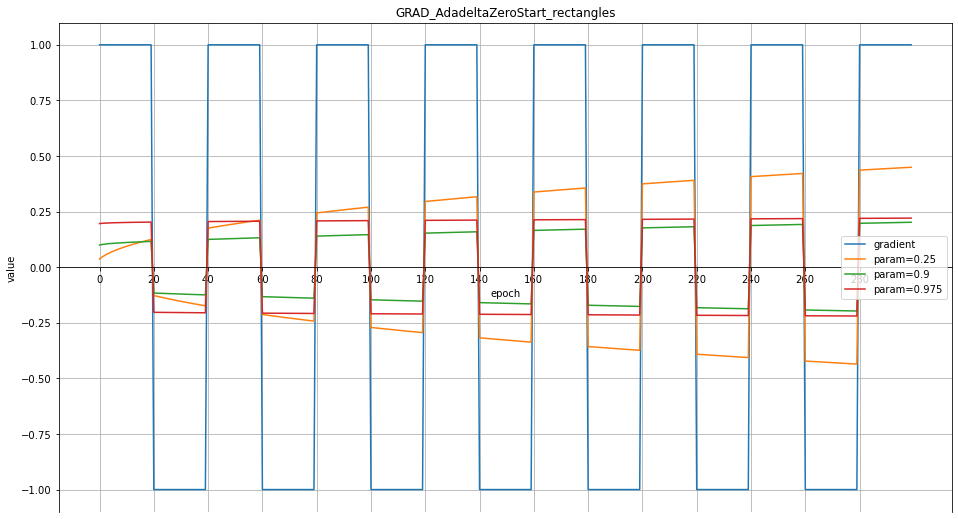

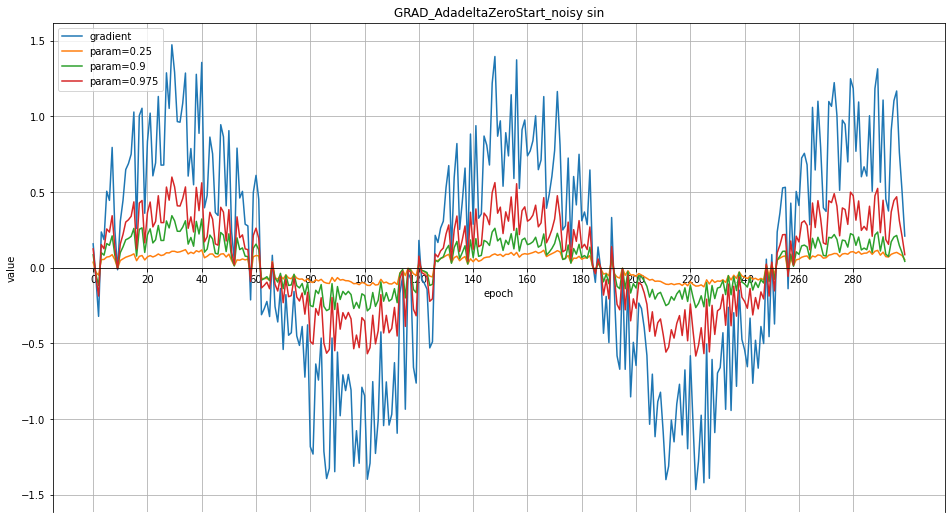

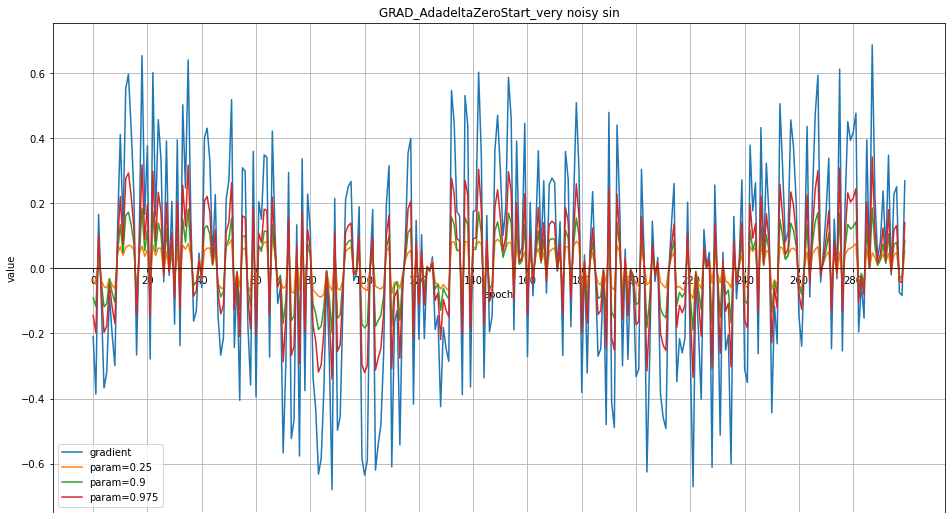

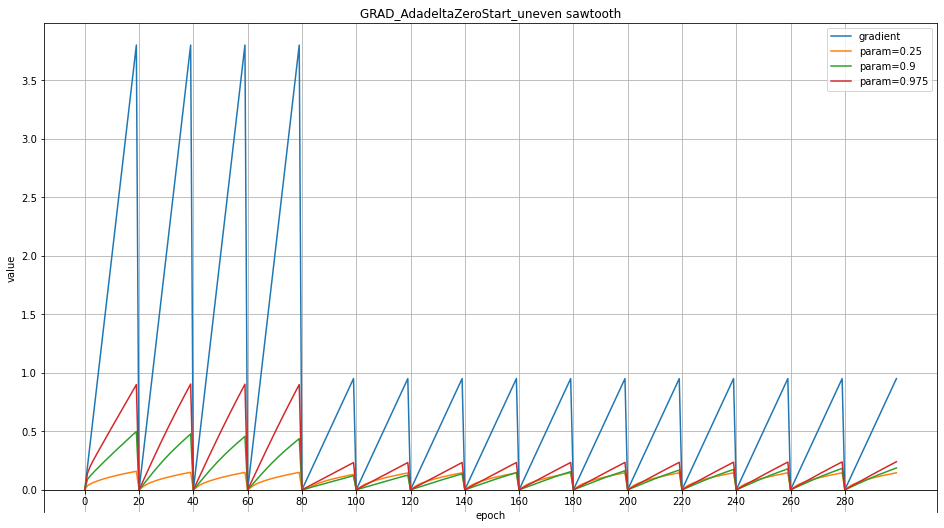

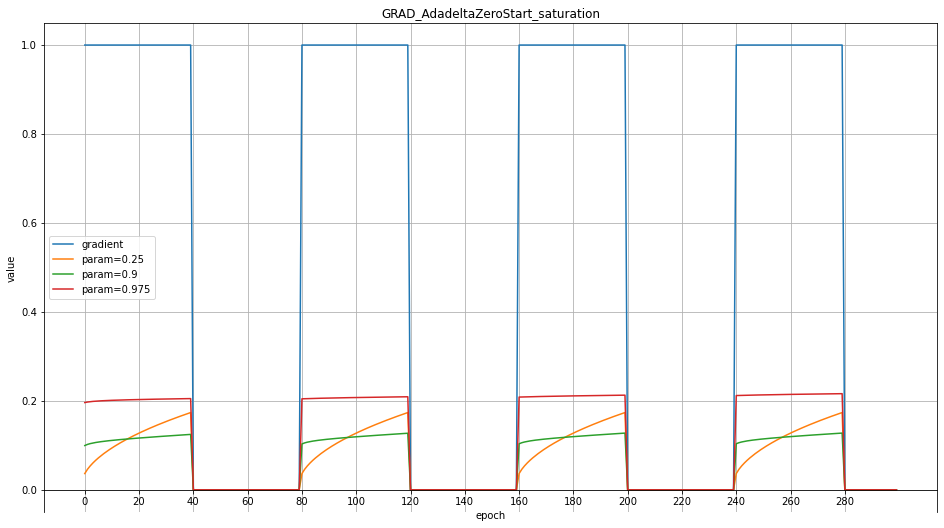

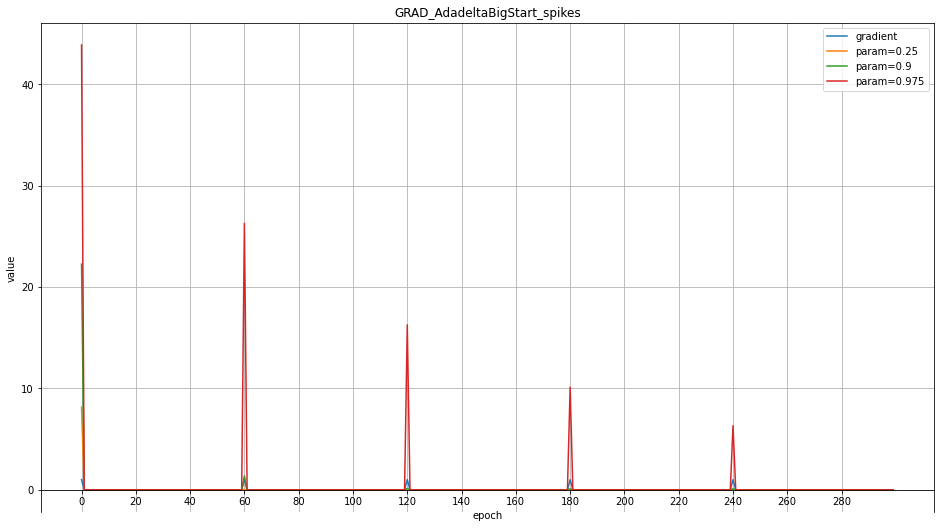

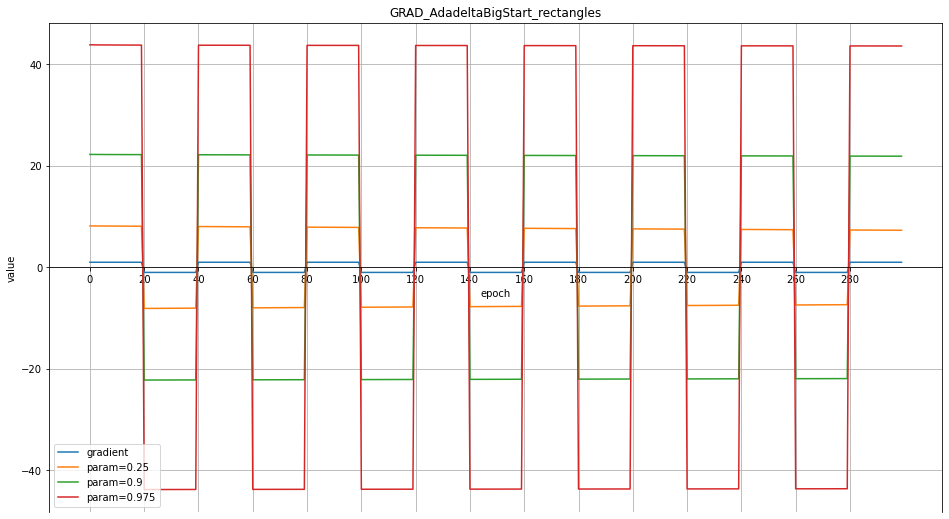

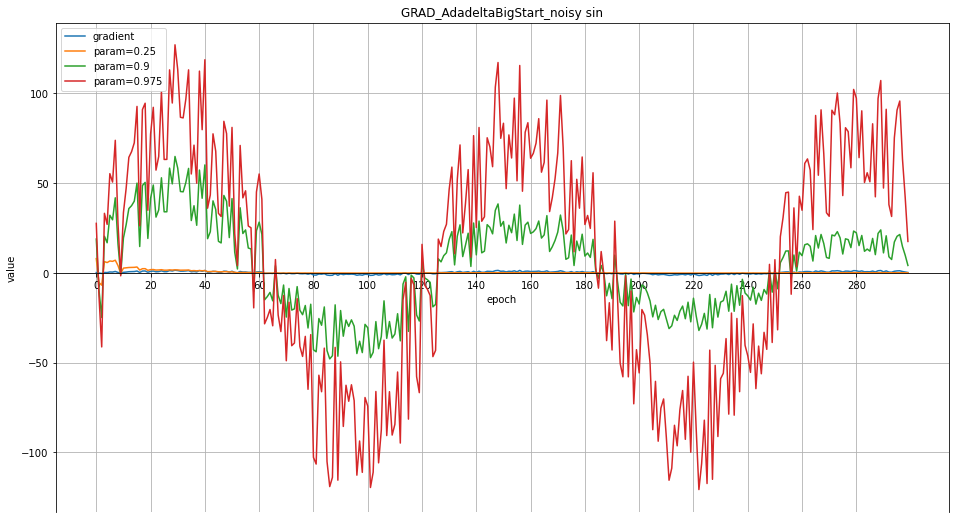

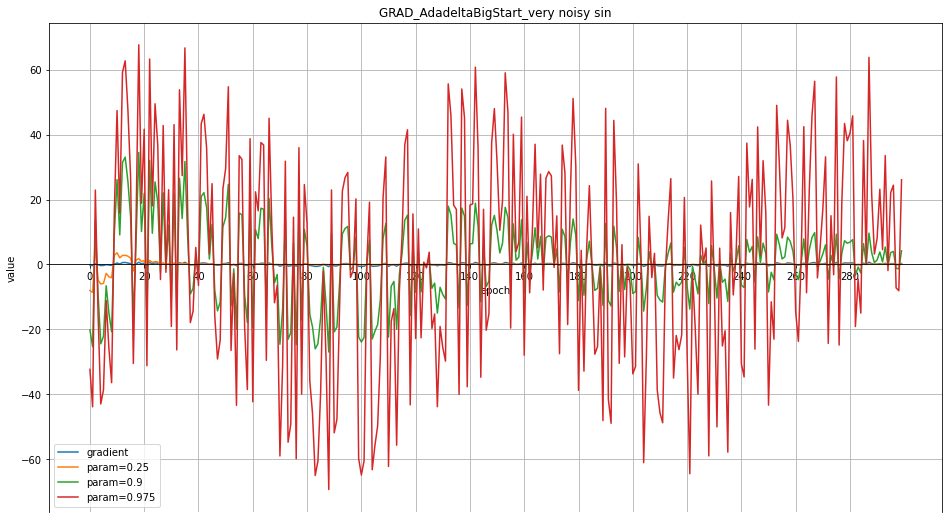

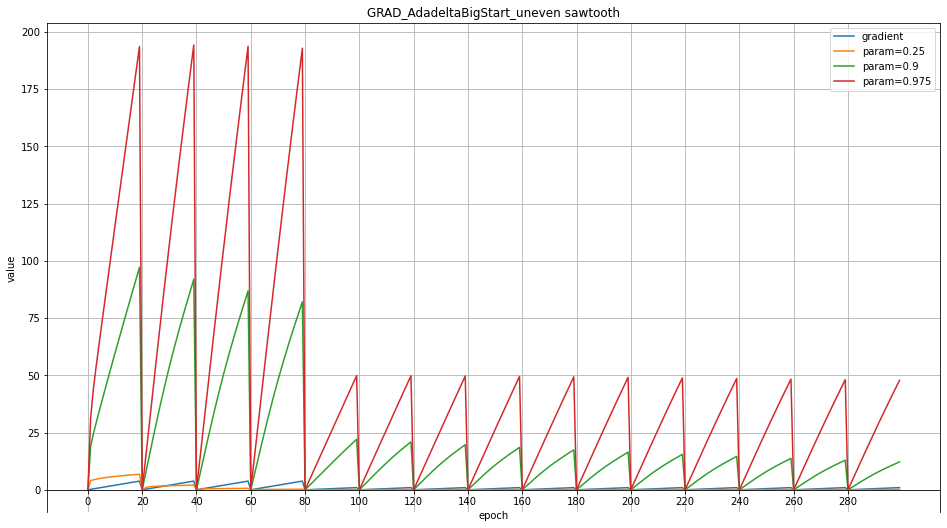

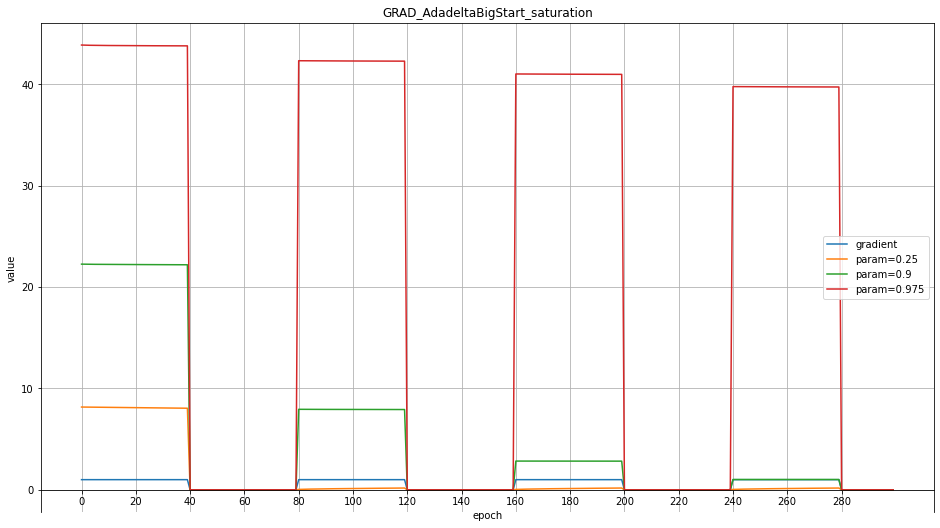

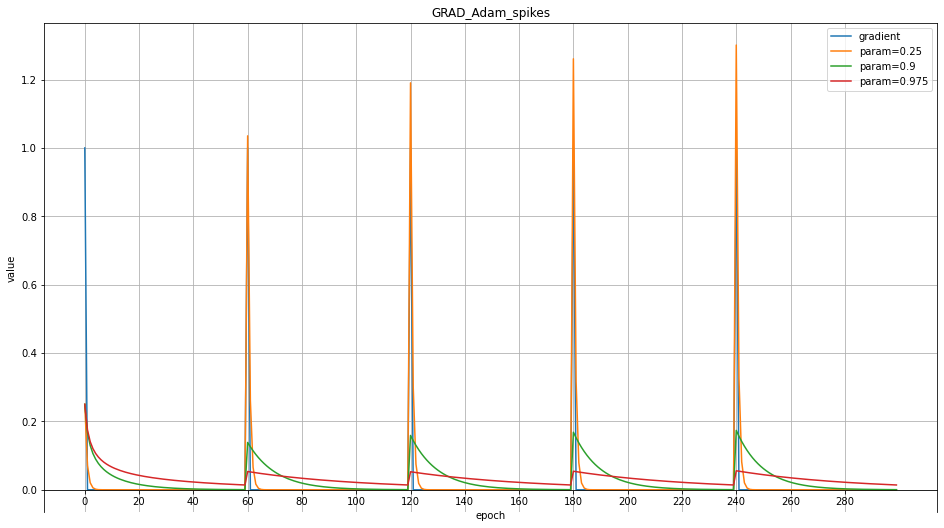

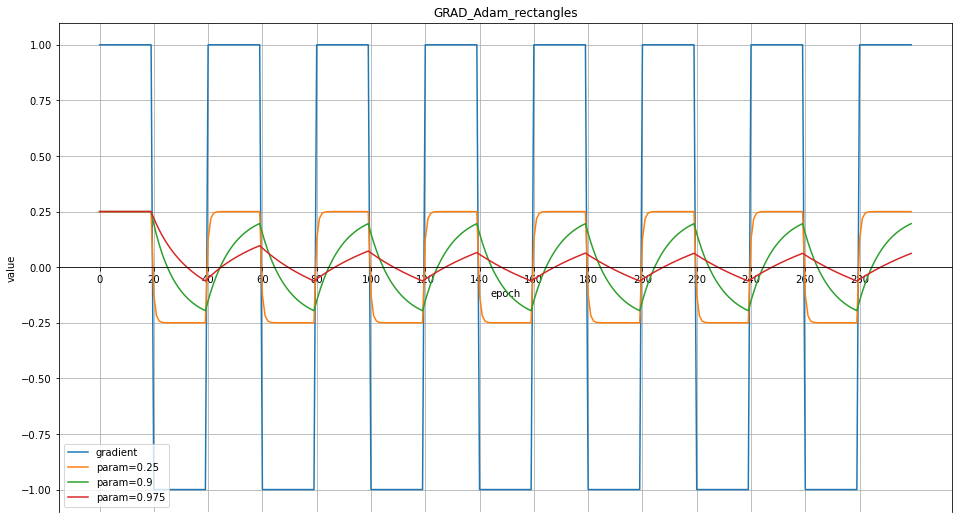

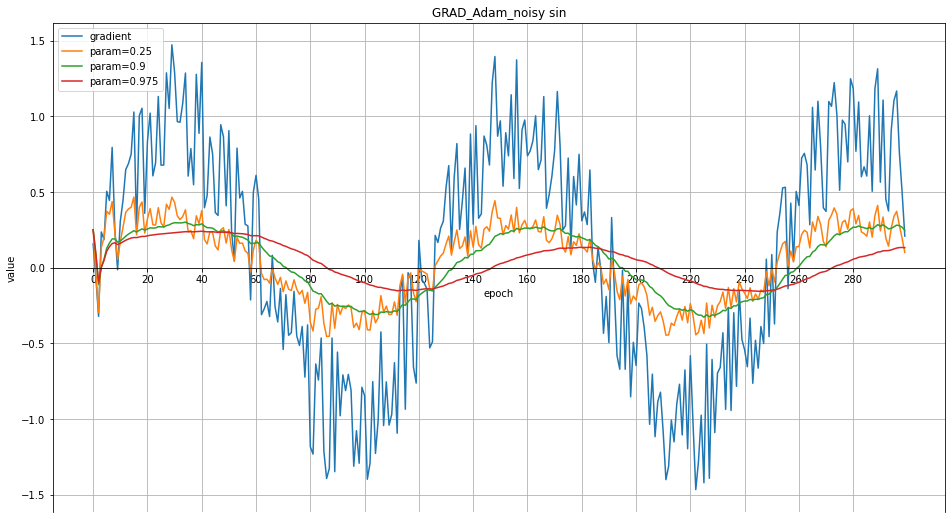

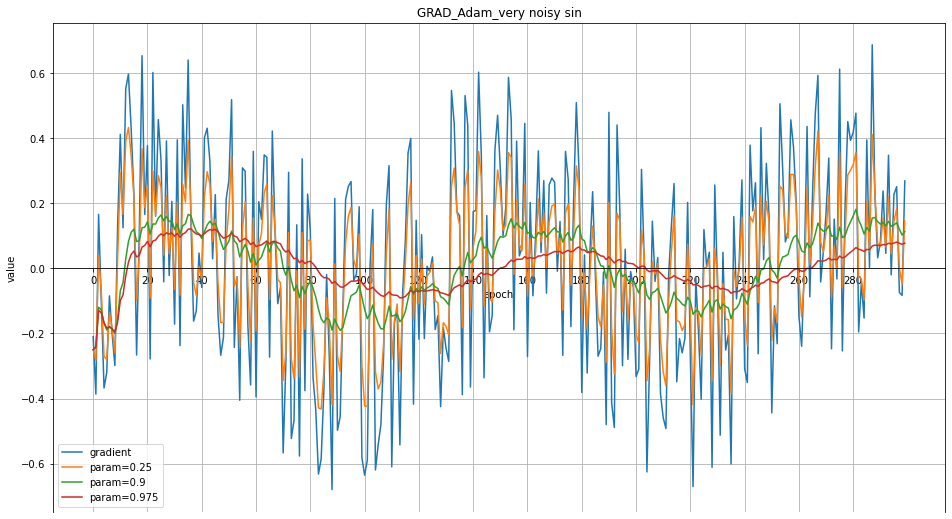

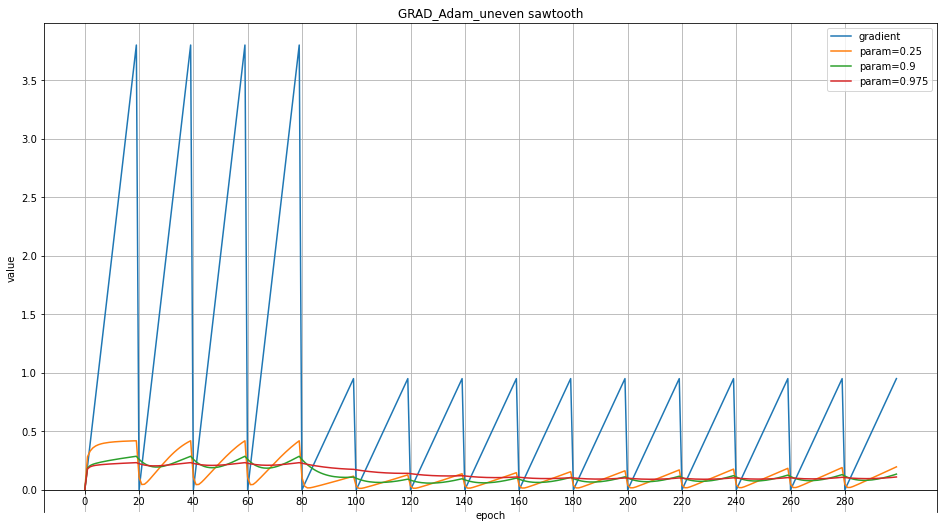

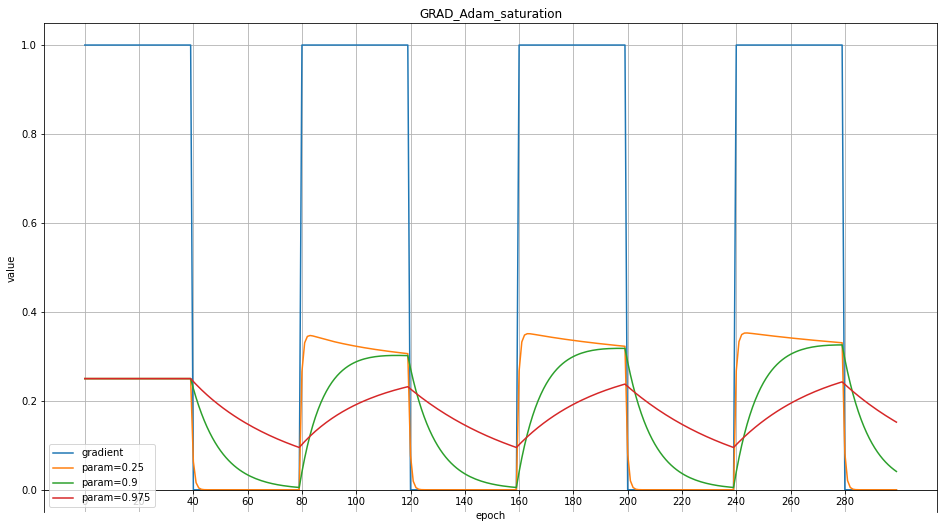

In [24]:
from matplotlib import pyplot as plt
import numpy as np
from math import ceil, floor

def linear_interpolation(X, idx):
    idx_min = floor(idx)
    idx_max = ceil(idx)
    if idx_min == idx_max or idx_max >= len(X):
        return X[idx_min]
    elif idx_min < 0:
        return X[idx_max]
    else:
        return X[idx_min] + (idx - idx_min)*X[idx_max]

def EDM(X, gamma, lr=0.25):
    Y = []
    v = 0
    for x in X:
        v = gamma*v + lr*x
        Y.append(v)
    return np.asarray(Y)

def NM(X, gamma, lr=0.25):
    Y = []
    v = 0
    for i in range(len(X)):
        v = gamma*v + lr*(linear_interpolation(X, i+gamma*v) if i+gamma*v < len(X) else 0)
        Y.append(v)
    return np.asarray(Y)

def SmoothedNM(X, gamma, lr=0.25):
    Y = []
    v = 0
    for i in range(len(X)):
        lookahead4 = linear_interpolation(X, i+gamma*v/4)   if i+gamma*v/4      < len(X) else 0
        lookahead3 = linear_interpolation(X, i+gamma*v/2)   if i+gamma*v/2      < len(X) else 0
        lookahead2 = linear_interpolation(X, i+gamma*v*3/4) if i+gamma*v*3/4    < len(X) else 0
        lookahead1 = linear_interpolation(X, i+gamma*v)     if i+gamma*v        < len(X) else 0
        v = gamma*v + lr*(lookahead4 + lookahead3 + lookahead2 + lookahead1)/4
        Y.append(v)
    return np.asarray(Y)

def Adagrad(X, eps, lr=2.5):
    Y = []
    G = 0
    for x in X:
        G += x*x
        v = lr/np.sqrt(G + eps)*x
        Y.append(v)
    return np.asarray(Y)

def RMSProp(X, gamma, lr=0.25, eps=0.00001):
    Y = []
    EG = 0
    for x in X:
        EG = gamma*EG + (1-gamma)*x*x
        v = lr/np.sqrt(EG + eps)*x
        Y.append(v)
    return np.asarray(Y)

def Adadelta(X, gamma, lr=50.0, eps=0.001):
    Y = []
    EG = 0
    EDTheta = lr
    for x in X:
        EG = gamma*EG + (1-gamma)*x*x
        v = np.sqrt(EDTheta + eps)/np.sqrt(EG + eps)*x
        Y.append(v)
        EDTheta = gamma*EDTheta + (1-gamma)*v*v
    return np.asarray(Y)

def AdadeltaZeroStart(X, gamma, eps=0.001):
    return Adadelta(X, gamma, lr=0.0, eps=eps)

def AdadeltaBigStart(X, gamma, eps=0.001):
    return Adadelta(X, gamma, lr=50.0, eps=eps)

def Adam(X, beta1, beta2=0.999, lr=0.25, eps=0.0000001):
    Y = []
    m = 0
    v = 0
    for i, x in enumerate(X):
        m = beta1*m + (1-beta1)*x
        v = beta2*v + (1-beta2)*x*x
        m_hat = m/(1- pow(beta1, i+1) )
        v_hat = v/(1- pow(beta2, i+1) )
        dthetha = lr/np.sqrt(v_hat + eps)*m_hat
        Y.append(dthetha)
    return np.asarray(Y)

np.random.seed(413)
X = np.arange(0, 300)

D_Thetha_spikes = np.asarray( [int(x%60 == 0) for x in X])
D_Thetha_rectangles = np.asarray( [2*int(x%40 < 20) - 1 for x in X])
D_Thetha_noisy_sin = np.asarray( [np.sin(x/20) + np.random.random() - 0.5 for x in X])
D_Thetha_very_noisy_sin = np.asarray( [np.sin(x/20)/5 + np.random.random() - 0.5 for x in X])
D_Thetha_uneven_sawtooth = np.asarray( [ x%20/(15*int(x > 80) + 5) for x in X])
D_Thetha_saturation = np.asarray( [ int(x % 80 < 40) for x in X])

for method_label, method, parameter_step in [
                ("GRAD_Simple_Momentum", EDM, [0.25, 0.5, 0.9, 0.975]),
                ("GRAD_Nesterov", NM, [0.25, 0.5, 0.9, 0.975]),
                ("GRAD_Smoothed_Nesterov", SmoothedNM, [0.25,0.5, 0.9, 0.975]),
                ("GRAD_Adagrad", Adagrad, [0.0000001, 1, 0.1, 10.0]),
                ("GRAD_RMSProp", RMSProp, [0.25, 0.9, 0.975]),
                ("GRAD_AdadeltaZeroStart", AdadeltaZeroStart, [0.25, 0.9, 0.975]),
                ("GRAD_AdadeltaBigStart", AdadeltaBigStart, [0.25, 0.9, 0.975]),
                ("GRAD_Adam", Adam, [0.25, 0.9, 0.975]),
            ]:
    for label, D_Thetha in [("spikes", D_Thetha_spikes),
                            ("rectangles", D_Thetha_rectangles),
                            ("noisy sin", D_Thetha_noisy_sin),
                            ("very noisy sin", D_Thetha_very_noisy_sin),
                            ("uneven sawtooth", D_Thetha_uneven_sawtooth),
                            ("saturation", D_Thetha_saturation), ]:
        fig = plt.figure(figsize=[16.0, 9.0])
        ax = fig.add_subplot(111)

        ax.plot(X, D_Thetha, label="gradient")
        for gamma in parameter_step:
            Y = method(D_Thetha, gamma)
            ax.plot(X, Y, label="param="+str(gamma))

        ax.spines['bottom'].set_position('zero')
        full_name = method_label + "_" + label

        plt.xticks(np.arange(0, 300, 20))
        plt.grid(True)
        plt.title(full_name)
        plt.xlabel('epoch')
        plt.ylabel('value')
        plt.legend()
        plt.show(block=True) #Uncoomment and comment next line if you just want to watch
        #plt.savefig(full_name)
        #plt.close(fig)

In [21]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>